#  SWMAL O2

## Dataanalysis

### Breast Cancer data

[<img src="images/image.png" width="250"/>](image.png)  

Breast cancer is a significant health concern worldwide, and predicting the likelihood of recurrence or the severity of cancer is crucial in making informed medical decisions and improving patient outcomes. It has recently been a topic of many awareness campaigns and discussions around the world. For our final project we have chosen to work with breast cancer data, and aim to develop a machine learning model that can predict the type of tumor (benign or malignant) based on cellular characteristics such as radius, texture, perimeter and more. By leveraging this data we hope to be able to predict whether a tumor is benign or malignant.  

<img src="images/bening_malignant.png" width="500"/>
  
comparison of benign and malignant characteristics [src_1]
  
We have selected the breast cancer dataset from the kaggle's uciml repository (https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) as the source of our data. This dataset is a standard dataset widely used in the machine learning community. It contains means, standard deviation as well as 'worst values' of cell characteristics found in images of fine needle aspirates (cell samples from breast cells), which is likely to make it suitable for our predictive modeling task. An example of an image of breast mass cells can be seen on an image below.

<img src="images/breast_mass_fna.png" width="500"/>  
  
image of a sample of breast mass [src_2]

Our chosen dataset comprises the following key characteristics:

Features: The dataset includes 33 features, which could be split into 4 types: 
* means of cell characteristics
* std deviation of cell characteristics
* worst values of cell characteristics
* miscellaneous data such as id or diagnosis

Number of Samples: The dataset contains a total of 569 samples, 357 samples with benign type and 212 of malignant type.
Target Values: The target variable we aim to predict is the diagnosis or type of tumor which can be either bening('B') or malignant('M'). 
Data Quality: We will perform data preprocessing and quality checks to address any missing values or potential outliers.

Our primary goal is to build a classification model using machine learning techniques. We will train and evaluate various classification algorithms, such as logistic regression, support vector machines, decision trees, and ensemble methods, as well as multilayer perceptrons to predict the type of tumor from a cell sample. The model's performance will be assessed using appropriate evaluation metrics, including accuracy, precision, recall, and F1-score.
Additionally, we plan to explore data visualization techniques to gain insights into the relationships between different features and the likelihood of recurrence.

In summary, our project aims to leverage machine learning to develop a predictive model that can assist in identifying women at danger of malignant cancer. 

  

[src_1]:https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240  
[src_2]:https://openi.nlm.nih.gov/detailedresult?img=PMC3395750_jbc-15-244-g002&req=4

### Dataanalyse af eget datasæt



In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
data_breast_cancer = pd.read_csv("breast_cancer_win/data.csv")

# data (as pandas dataframes)
print(data_breast_cancer.shape)
features = data_breast_cancer.columns
print(len(features))

print("Data features: \n", features)
print(data_breast_cancer.describe())




(569, 33)
33
Data features: 
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351

The data contains results of image analysis from images of cell samples, looking at their visual characteristics. Each one of the 569 data points is in itself an analysis of the cell features from an image. It has 4 distinct categories: "diagnosis" which tells whether the type of tumor is malignant or benign, and [mean, se, worst] which are the mean, standard error and worst values of the cells in an image. 

We can immediatily see that one of the features, called "Unnamed: 32" contains a lot of NaN values (Not a number) and seems to be an error. We can there fore safely delete it. We also do not need to know the unique id of any of the data, so we drop that too.


In [ ]:
data_breast_cancer.drop(columns=["Unnamed: 32", "id"], inplace=True)

At a glance it is also apparent that the features are grouped into:

mean
se
worst

For now let us take a look at the mean values

In [ ]:
means_labels : list[str] = list(data_breast_cancer.columns[1:11])
worst_labels : list[str] = list(data_breast_cancer.columns[-10: -1])
print(means_labels)
print(worst_labels)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']



We will now visualize the features, and make a snap judgement of whether there is any immediate connection with the diagnosis. To do that we will first group the data into Malignant/Benign types.



In [ ]:

# Set the data diagnosis results to integers
data_breast_cancer['diagnosis'] = data_breast_cancer['diagnosis'].map({"M":1,"B":0})

# split dataframe into two based on diagnosis
dfM=data_breast_cancer[data_breast_cancer['diagnosis'] == 1]
dfB=data_breast_cancer[data_breast_cancer['diagnosis'] == 0]



Looking at the means as the whole the distribution, we will take a look at histograms of each feature


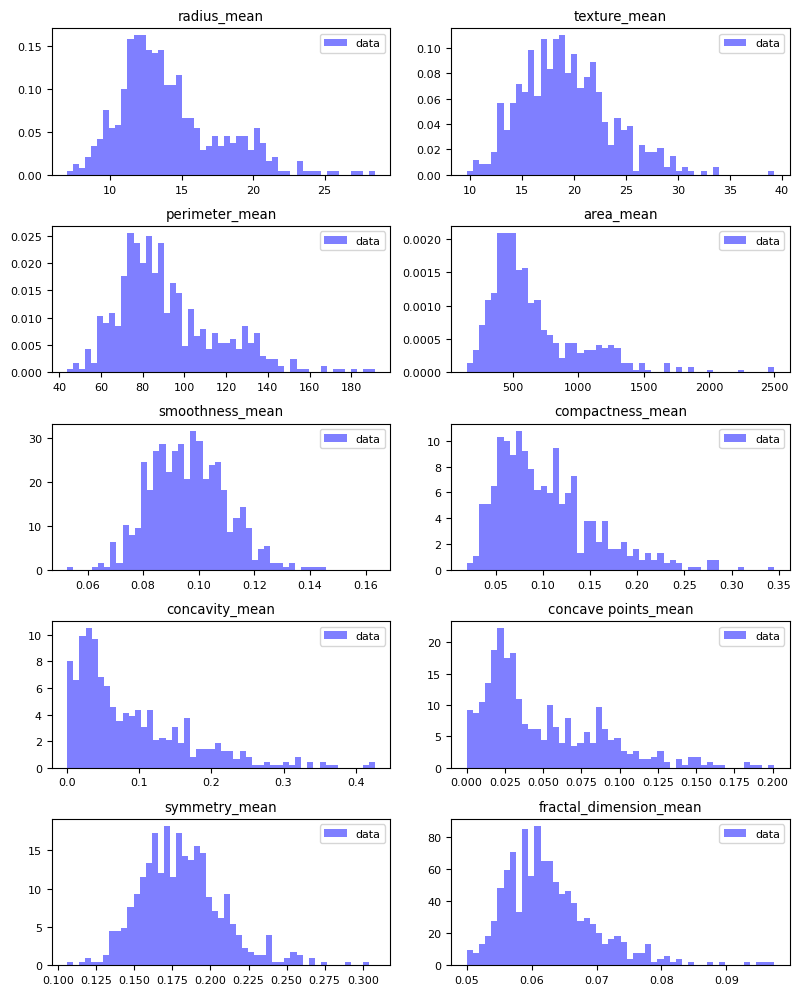

In [ ]:
import numpy as np

plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure

    # print (max( data_breast_cancer[means_labels[idx]]))
    binwidth= (max( data_breast_cancer[means_labels[idx]]) - min(data_breast_cancer[means_labels[idx]]))/50
    ax.hist([data_breast_cancer[means_labels[idx]]],
             bins=np.arange(min(data_breast_cancer[means_labels[idx]]),
             max(data_breast_cancer[means_labels[idx]]) + binwidth, binwidth) ,
             alpha=0.5,stacked=True, density = True, label=['data'],color=['b'])
    ax.legend(loc='upper right')
    ax.set_title(means_labels[idx])
plt.tight_layout()
plt.show()

Now we plot histograms of the data features grouped into Benging/Malignant, with different colors for the different diagnosises.

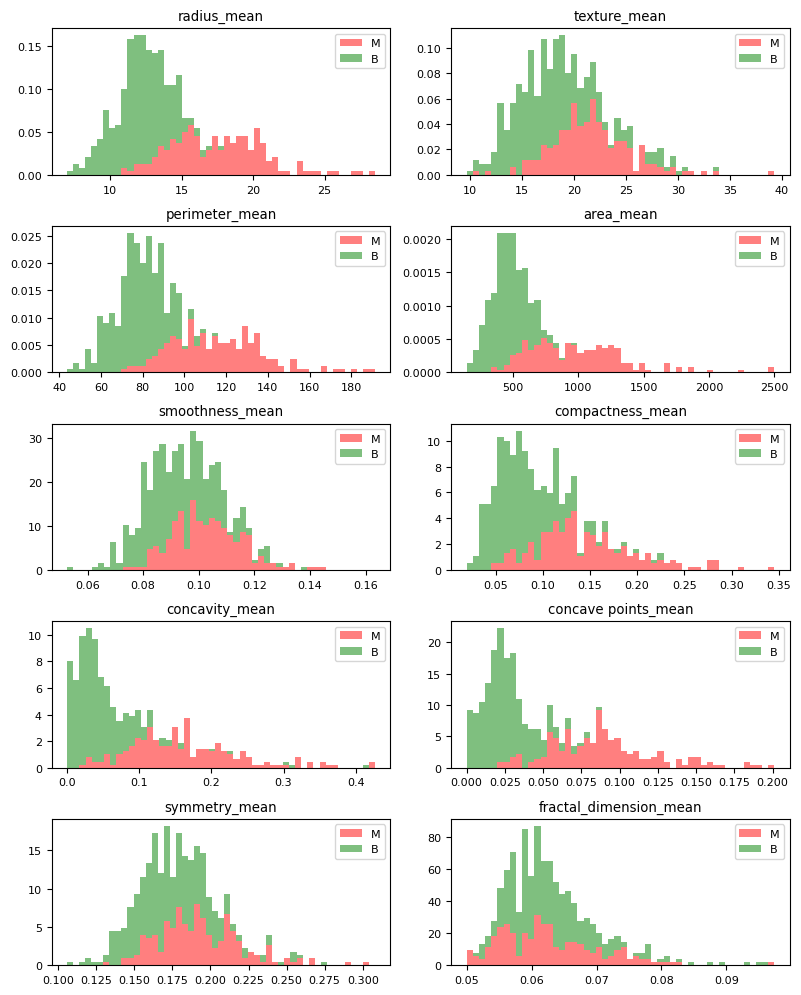

In [ ]:
# Show the distribution of data between malignant and benign diagnosis
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure

    # print (max( data_breast_cancer[means_labels[idx]]))
    binwidth= (max( data_breast_cancer[means_labels[idx]]) - min(data_breast_cancer[means_labels[idx]]))/50
    ax.hist([dfM[means_labels[idx]],dfB[means_labels[idx]]],
             bins=np.arange(min(data_breast_cancer[means_labels[idx]]),
             max(data_breast_cancer[means_labels[idx]]) + binwidth, binwidth) ,
             alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(means_labels[idx])
plt.tight_layout()
plt.show()

From the distribution histograms it seems that there is a correlation between nuclei cell features and the types of cancer: for most of the data features malignant tumors tends to have right-skewed data in comparison to the benign tumors. This, however, isn't the case for fractal_dimension_mean, and seems to be less pronounced in symmetry_mean.

While there are outliers in the dataset, it seems that those outliers can be important to our model, and they don't seem to be extreme enough to transform the data based on them. 

In [ ]:
print("B description:")
print(dfB.describe())
print("M description:")
print(dfM.describe())

B description:
       diagnosis  radius_mean  texture_mean  perimeter_mean   area_mean  \
count      357.0   357.000000    357.000000      357.000000  357.000000   
mean         0.0    12.146524     17.914762       78.075406  462.790196   
std          0.0     1.780512      3.995125       11.807438  134.287118   
min          0.0     6.981000      9.710000       43.790000  143.500000   
25%          0.0    11.080000     15.150000       70.870000  378.200000   
50%          0.0    12.200000     17.390000       78.180000  458.400000   
75%          0.0    13.370000     19.760000       86.100000  551.100000   
max          0.0    17.850000     33.810000      114.600000  992.100000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       357.000000        357.000000      357.000000           357.000000   
mean          0.092478          0.080085        0.046058             0.025717   
std           0.013446          0.033750        0.043442          